# Homework 02

This Jupyter notebook file is a template that we provide for the homework.
You _must_ use this template and follow the instructions.
We require you to store specific intermediate results into _"submission variables"_ to unify the submission.
These values are printed at the _end_ of the jupyter notebook and will be (partially) used to grade your assignment.
Please ensure that these variables have the correct values and aren't overwritten by the following code cells.

In [340]:
# used for submission variables
from copy import deepcopy

In [341]:
## This cell contains all the introduced functions from the tutorials that I found useful for the completion of this Homework
## Credit to the ip4rs Lecutreres as I have not written this code myself
def quant_norm_data(
    data: np.ndarray, lower_quant: float = 0.01, upper_quant: float = 0.99
) -> np.ndarray:
    """
    Normalize the data by quantiles `lower_quant/upper_quant`.
    The quantiles are calculated globally/*across all channels*.
    """
    masked_data = np.ma.masked_equal(data, 0)
    lq, uq = np.quantile(masked_data.compressed(), (lower_quant, upper_quant))
    data = np.clip(data, a_min=lq, a_max=uq)
    data = (data - lq) / (uq - lq)
    return data

def vis(data: np.ndarray, quant_norm: bool = True):
    """
    Visualize an array by calling `imshow` with `cmap="gray"`.
    By default, the image is normalized through `quant_norm_data`vis(subregion_uint8[:,:,1],quant_norm=False).
    """
    if quant_norm:
        data = quant_norm_data(data)

    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(data, cmap="gray")

In [342]:
# importing libraries
# you can import any that are installed in Docker/Paperspace environment
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

## Manually applying filters

In the theoretical lecture, you have seen a way to visualize and _manually_ calculate the convolution results.
Please apply this _manual_ convolution method to the following input array.
For this task, you can only use basic numpy operators (`+ - / @`) and for loops.

Apply the manual convolution method using:
- 0-padding
- Reflection
    - `a b c d` as input leads to the following reflections on the left and right-hand sides:
        - `d c b a | a b c d | d c b a`

In [389]:
inp_arr = np.array(
    [
        [1, 0, 1],
        [0, 1, 0],
        [0, 0, 0],
    ]
)

kernel = np.array(
    [
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
    ]
)

output_arr_0_pad = np.zeros((3, 3))
output_arr_reflect = np.zeros((3, 3))

In [390]:
output_arr_0_pad = np.zeros((3, 3))
output_arr_reflect = np.zeros((3, 3))

# Add your code

In [387]:
import math
def flip_kernel(kernel:np.array)->np.array:
    return np.flip(kernel,axis=None)#Flips it on all axis as axis is non

def get_padding_space(kernel:np.array)->tuple:
    '''returns the amount of padding needed on the x and y axis'''
    len_x,len_y = kernel.shape
    return(math.ceil(len_x/2)-1,math.ceil(len_y/2)-1)

def create_padded_array(arr:np.array, padding_space:tuple, pad_type:str = "constant") ->np.array:
    '''symmetric = refrelction, constant = 0-padding
    Creates a Padded Array from the input array
    It uses numpy Padding therefore it supports all of numpys padding modes'''
    new_arr = np.pad(arr,[padding_space[0],padding_space[1]],mode=pad_type)
    return(new_arr)

def convolute2d(inp_arr:np.array,kernel:np.array,pad_type:str = "constant")->np.array:
    '''symmetric = refrelction, constant = 0-padding, 
    Only supports kernel shapes with odd side lengths!!!
    Watch out with big kernels as they increase the runtime by ^4'''
    padding_space = get_padding_space(kernel=kernel)
    padded_array = create_padded_array(arr=inp_arr,padding_space=padding_space,pad_type=pad_type)
    flipped_kernel = flip_kernel(kernel=kernel)

    out_arr = np.zeros(inp_arr.shape)

    ## Watch out! Long runtime on big kernel sizes
    for i in range(inp_arr.shape[0]):
        for j in range(inp_arr.shape[1]):
            for x in range(flipped_kernel.shape[0]):
                for y in range(flipped_kernel.shape[1]):
                    out_arr[i,j] += padded_array[i+x,j+y]*flipped_kernel[x,y]
    return out_arr

In [391]:
output_arr_0_pad = convolute2d(inp_arr=inp_arr,kernel=kernel,pad_type="constant")
output_arr_reflect = convolute2d(inp_arr=inp_arr,kernel=kernel,pad_type="symmetric")

In [347]:
# DO NOT EDIT
submission_output_arr_0_pad = deepcopy(output_arr_0_pad)
submission_output_reflect = deepcopy(output_arr_reflect)
###

Visualize the outputs of the convolution operation and plot the results _next_ to each other in a single row.

In [348]:
# Add code to visualize the results next to each other

Zero Padded:
 [[1. 0. 1.]
 [0. 2. 0.]
 [0. 0. 1.]] 
Reflect Output:
 [[2. 1. 1.]
 [1. 2. 0.]
 [0. 0. 1.]]
White = 2, Grey = 1, Black = 0


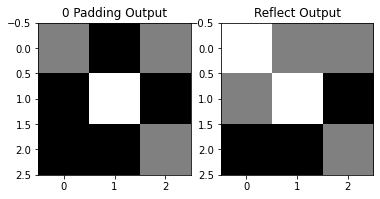

In [349]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(output_arr_0_pad,cmap="gray")
ax1.set_title("0 Padding Output")
ax2.imshow(output_arr_reflect,cmap="gray")
ax2.set_title("Reflect Output")
#plt.yticks([0,1,2])
#plt.xticks([0,1,2])
print("Zero Padded:\n",output_arr_0_pad,"\nReflect Output:\n",output_arr_reflect)
print("White = 2, Grey = 1, Black = 0")

## Applying filters to satellite data

After manually applying the convolution operation to the input, you can now use the functions provided by `scipy` for the remaining tasks.

1. Download the image from the following link:
    - https://tubcloud.tu-berlin.de/s/mPLKMiHdSbbnNcH/download/noisy_river.npz
    - Note: The image data has already been converted to the [0, 1] range, so there is no need to apply any _preprocessing/normalization_ to the data!
1. Extract and visualize the channel that is named `blue`
1. Apply filters that are designed for _denoising_ the input image
    - Select a single filter for generating the denoised output
    - Explain why you have selected the filter and why you have chosen the specific kernel size
    - Visualize the denoised image
2. Apply filters that are not designed for denoising with varying sizes and padding strategies to the _denoised_ image
    - What is the effect of the padding strategy on the output?
    - What do you notice when changing the padding strategy?


In [350]:
# Download the noisy image from within the notebook
# And visualize the blue band
noisy_blue_band = ...


In [351]:
from simple_downloader import download

TUB_URL = "https://tubcloud.tu-berlin.de/s/mPLKMiHdSbbnNcH/download/noisy_river.npz"
output_file = download(TUB_URL, "./data/")

Target file already exists!
Will skip download. To force download set `force=True`


In [352]:
with np.load('data/noisy_river.npz') as data:
    r = data["red"]
    g = data["green"]
    b = data["blue"]
    red_label,green_label,blue_label = data
noisy_blue_band = b.copy()

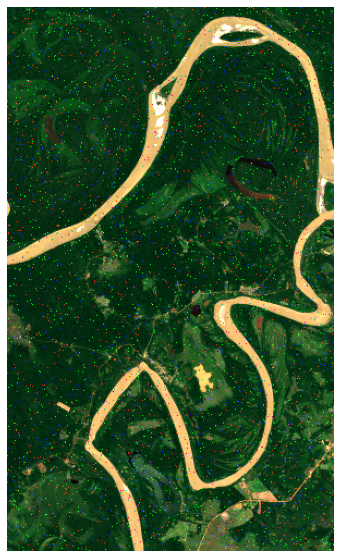

In [353]:
#This is the complete Image Band.
vis(np.stack([r,g,b],axis=-1,),False)

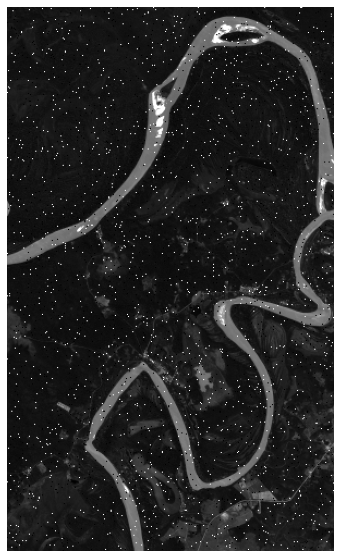

In [354]:
#This is the Blue Image Band.
vis(np.stack([b],axis=-1,),False)

In [355]:
# DO NOT EDIT
submission_noisy_img = deepcopy(noisy_blue_band)
###

In [356]:
# Denoise the image with a _single_ filter and visualize the result
denoised_img = ...

In [357]:
plus_se = np.ones((3,3))#A 5,5 SE was yielding too blurry results which is why i stuck with the 3,3
plus_se[0,0] = plus_se[0,-1] = plus_se[-1,-1] = plus_se[-1,0] = 0

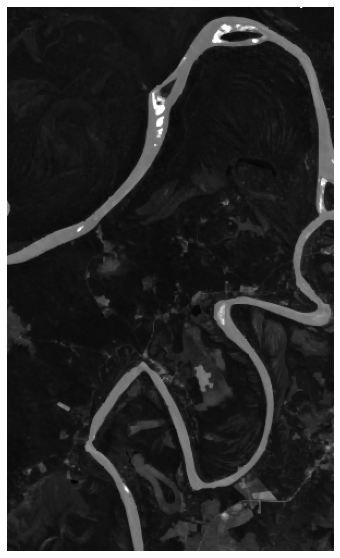

In [358]:
#denoised_img = ndimage.convolve(b, weights=np.ones((5, 5))) doesnt really filter it just blurrs it
#denoised_img = ndimage.grey_opening(b,footprint=plus_se) # grey opening or closing still leave small noise dots scattert all over the place.
denoised_img = ndimage.median_filter(b, footprint=plus_se)# size=(3, 3))
vis(np.stack([denoised_img],axis=-1,),False)

Add a short discussion about _why_ you selected the filter and _why_ the chosen kernel size was selected, not a different one.

## Short Discussion
### Why Median Fitler
I chose the Median Filter as it is best suited to cancel out noise. The average filter worked not well it all. It just blurred the image band but did not reduce the noise at all.
I eroded and opened the image for noise reduction as well. That didnt work at all as it just increased the noise. One could argue to work with openings or closings but they still leave little dots of noise scattered around. A Plus SE worked best to do the openings/closiung filtering. However, a convolution median filter yielded better results in terms of noise reduction for me.

### Why Kernel Size
I chose the Kernel-Size of 3 for the convolution filtering as I wanted to use a kernel as small as possible to not blur or alter the input image too much. From the previous homework I gathered that the smallest possible odd shaped kernel works best.
A kernel of size 1 did not change anything as that would just take the median of the value which is that value. A kernel with the side length two would have left out some noise bits as the noise sometimes comes in pixel-pairs. Side lenght of 3 was just perfect.
A larger kernel size would possibly be needed if the noise was not as granular. If there were more clustered noise particles a larger kernel could proof to be useful.
I improved the kernel to a plus SE as that yielded the same results as the rectangular SE. but did not take as many bordering pixels into account.

In [359]:
# DO NOT EDIT
submission_denoised_img = deepcopy(denoised_img)
###

In [360]:
# apply different filter operations with various sizes and
# padding strategies to the denoised image
# try to visualize a couple of outputs that support your
# arguments in the padding-strategy discussion!

# (denoised_img)

In [361]:
show_padding = np.array(
    [
        [5, 5, 0, -5,-5],
        [10, 10, 0, -10,-10],
        [10, 10, 0, -10,-10],
        [10, 10, 0, -10,-10],
        [5, 5, 0, -5,-5],
    ]
)

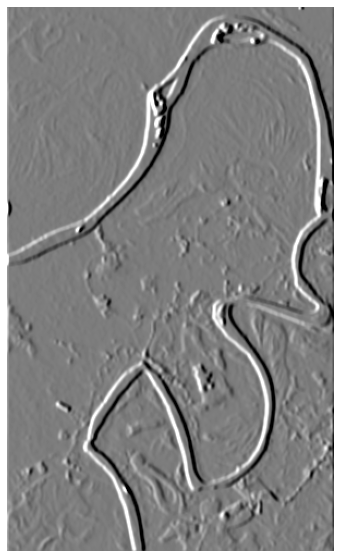

In [362]:
#Im using my own convolution funciton as i can define padding and kernel in that function in one go.
vis(convolute2d(denoised_img,show_padding,pad_type="constant"))

In [375]:
import rich
rich.print(convolute2d(denoised_img,show_padding,pad_type="constant"))

[[ 3.51111111  1.28       -0.80888889 ...  0.06666667 -1.67555556
  -3.44888889]
 [ 4.92444444  1.85777778 -1.07555556 ... -0.03111111 -2.41333333
  -4.78222222]
 [ 5.56888889  2.23555556 -1.03111111 ... -0.12888889 -2.83111111
  -5.45777778]
 ...
 [ 7.60444444  3.72444444 -0.29777778 ... -3.24888889 -6.31111111
  -9.73333333]
 [ 7.32444444  3.72444444 -0.08444444 ... -2.68       -6.29777778
  -9.76888889]
 [ 5.49777778  3.          0.26222222 ... -2.09777778 -5.15555556
  -7.67555556]]

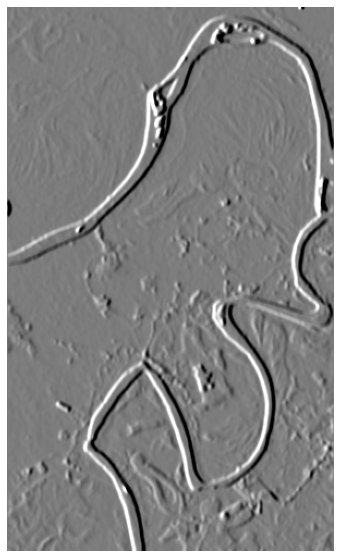

In [363]:
#Im using my own convolution funciton as i can define padding and kernel in that function in one go.
vis(convolute2d(denoised_img,show_padding,pad_type="symmetric"))

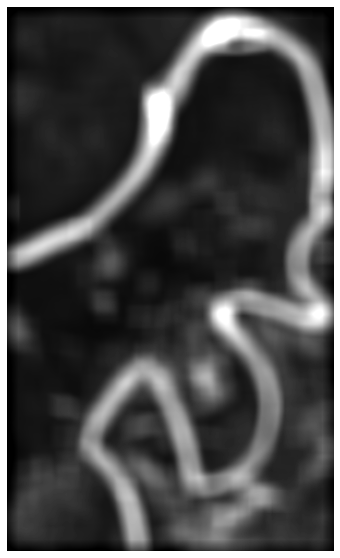

In [364]:
vis(convolute2d(denoised_img,np.ones((21,21)),pad_type="constant"))

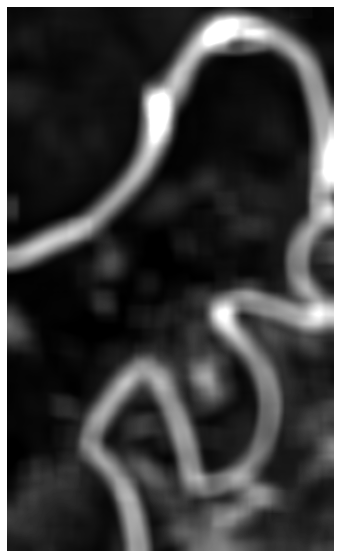

In [365]:
vis(convolute2d(denoised_img,np.ones((21,21)),pad_type="symmetric"))

Add a short discussion about the padding strategy here.

### Short discussion about the padding strategy

The 0 padding strategy lead, in this example, with an edge detection filter to a gray pixel row on the left and a black pixel row on the right of the image.
This is not observable in the symmetric / mirrored padding strategy.
This problem is really quite difficult to point out as this only affects one or two pixel rows on the border and they are difficult to point out with the imshow function due to the big white border.
The rich printout to the terminal shows however, that the leftmost and rightmost values are really high/low therefore indicating an error in the edge detection due to the padding.

The problem really needs a big Kernel Size as a small kernel modifies less rows which make it difficult to the naked eye to point out.

The Padding and the kernel are in a relation as the kernel size dictates how much padding is needed. Therefore a bigger kernel increases the effect of the padding strategy and therefore the error on the border of the image.
This is visible on the average filter where I applied a zero-padding strategy. There you can see a clear black shadow around the image that is due to the enormus 10 pixel padding and 21 side long kernel. That effect is not as visible with the symmetric/mirroring padding strategy.

#### My Preferred Padding Strategy
I like numpys symmetric / mirroring padding strategy. I played around with the other options in numpy but found that this one is to be the least prone to visible error when applying filters or normalization.

### Creating features

Create an output feature map that highlights the river edges.
- You can apply multiple filter operations after each other to generate the output feature map
- You can arbitrarily compose the intermediate results
    - For example, by adding feature maps of filter responses together
- The final feature map should be normalized to the range between 0 -- 1
- Your strategy _must_ include _custom_ kernels that were not presented in the theoretical lecture

Visually compare your output to the following image:

![](river_edges.png)

> If the image isn't displayed, make sure that the image file is located next to this notebook! Otherwise, manually inspect the provided image file: `river_edges.png`

What is more/less prominent in your image?
Try to provide an intuitive explanation for why your filter composition choice generates the given output.
Motivate your choices and clarify that you haven't applied _random_ kernels to the output!

In [366]:
# create complex filter output

river_border_features = ...

In [382]:
jannis_x = np.array(
    [
        [2, 5, 0,-5,-2],
        [2, 5, 0,-5,-2],
        [2, 5, 0,-5,-2],
        [2, 5, 0,-5,-2],
        [2, 5, 0,-5,-2]
    ]
)
jannis_y = np.array(
    [
        [2, 2, 2, 2, 2],
        [5, 5, 5, 5, 5],
        [0, 0, 0, 0, 0],
        [-5, -5, -5, -5, -5],
        [-2, -2, -2, -2, -2],
    ]
)
jannis_d = np.array(
    [
        [0, 0, 4, 5, 0],
        [0, 4, 5, 0, -5],
        [4, 5, 0, -5, -4],
        [5, 0, -5, -4, 0],
        [0, -5, -4, 0, 0],
    ]
)
jannis_weights = [jannis_x,jannis_y,jannis_d]

In [392]:
jannis_border_features = sum([np.abs(ndimage.convolve(denoised_img, weights=x)) for x in jannis_weights])/len(jannis_weights)
river_border_features = jannis_border_features/jannis_border_features.max()#Dividing by max to limit the range from 0 to 1
river_border_features.min(),river_border_features.max(),river_border_features.mean()

(0.00012168410805548967, 1.0, 0.04479672866761697)

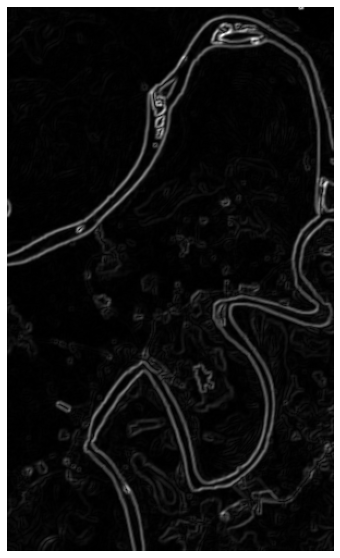

In [393]:
vis(river_border_features,quant_norm=False)

### Discussion on the Comparison between the two outpus:

First, I wanted to perform edge detection on horizontal, vertical and diagonal edges. (Therefore I added three feature maps that I combined to a complete one.)
That's why I defined three kernels. I realized that the Kernels from the lecture all had a side length of 3 and some had "rounded corners" that tried to decrease the effect of geometrically further away points. I decided to do everything completely different to try to observe something else entirely. That is why I didnt round off the edges of the kernels and that is why I also used a different ratio of parameters in the kernel: 5,4,2 instead of 1 and 2.

#### Similarities
The main edges are as visible as with the example picture.
The same kind of edges are probably visible as I detected horizontal, vertical and diagonal edges. The example probably also applied these three edge-detection variants.
(Using the Sobel Kernels I think I managed to create the exact same image.)

### Differences
My edge detection is quite a bit thicker which is really the fault of the presumably larger kernel size.

### Discussion
Surprisingly the overall kind of kernel does not seem to alter the edge detection too much. As long as the Kernel is point symmetric to the center with negative values on one side and positive ones on the other the edge detection does not seem to create too different visual differences.

When I used a kernel that would not have a net sum of all of it's places of 0, then the edge detection created more of an averaging out of all of the edges. (blur) 
When I applied just a one-sided kernel then the edge detection had also difficulties from lighter to darker edges and would overall be a little blurry.

My output does not contain any 0 pixel values as the kernels are quite big and as I added lots of feature maps together.
One could think about thresholding to get rid of very low values.

In [386]:
# This looks also really good with a little bit of thresholding
#vis(np.where(river_border_features >=np.median(river_border_features),river_border_features,0),quant_norm=False)

In [371]:
# DO NOT EDIT
submission_river_border_features = deepcopy(river_border_features)
###

## Submission

- Follow the instructions mentioned in this notebook
- You are _not_ allowed to install other libraries
    - The submitted jupyter notebook should be able to run as-is on Paperspace and/or the provided Docker image.
- Explain the steps that went into the decision making of the specific values
- Each homework must be done individually!
- The notebook should have been executed once before submitting it
    - The notebook should _not_ be _cleaned_ before submitting

Each student should submit the following materials to the ISIS system:
- One `zip` file containing the jupyter notebook named as: `IP4RS2022-HW2_<NAME_SURNAME>.zip`



### Submission variables

Please ensure that these variables are correct after you have restarted your notebook and executed all cells from top to bottom.
You are _not allowed_ to modify the following cells:

In [372]:
import rich

rich.print(f"{submission_output_arr_0_pad=}")
rich.print(f"{submission_output_reflect=}")
rich.print(f"{submission_noisy_img}")
rich.print(f"{submission_denoised_img=}")
rich.print(f"{submission_river_border_features}")

submission_output_arr_0_pad=array([[1., 0., 1.],
       [0., 2., 0.],
       [0., 0., 1.]])

submission_output_reflect=array([[2., 1., 1.],
       [1., 2., 0.],
       [0., 0., 1.]])

[[0.06666667 0.07911111 0.06222222 ... 0.06577778 0.06755556 0.07555556]
 [0.07377778 0.09422222 0.05688889 ... 0.07466667 0.07644444 0.072     ]
 [0.07466667 0.072      0.07555556 ... 0.06666667 0.064      0.06311111]
 ...
 [0.13066667 0.11466667 0.11555556 ... 0.10044444 0.13155556 0.13511111]
 [0.09955556 0.11555556 0.13422222 ... 0.15377778 0.16444444 0.16622222]
 [0.09155556 0.10222222 0.09066667 ... 0.184      0.13688889 0.14133333]]

submission_denoised_img=array([[0.06666667, 0.07911111, 0.06222222, ..., 0.06577778, 
0.06755556,
        0.07555556],
       [0.07377778, 0.07377778, 0.064     , ..., 0.07288889, 0.072     ,
        0.072     ],
       [0.07466667, 0.07466667, 0.06933333, ..., 0.06666667, 0.06666667,
        0.064     ],
       ...,
       [0.11466667, 0.11555556, 0.11466667, ..., 0.11644444, 0.13155556,
        0.13511111],
       [0.09955556, 0.11466667, 0.11555556, ..., 0.16444444, 0.15377778,
        0.16444444],
       [0.09155556, 0.10222222, 0.10222222, ..., 0.184     , 0.14133333,
        0.14133333]])

[[0.00929527 0.00426823 0.01640899 ... 0.00550128 0.00720857 0.00464763]
 [0.00597553 0.00474248 0.01346865 ... 0.00170729 0.00246609 0.00635493]
 [0.00161244 0.00502703 0.00929527 ... 0.00673433 0.00512188 0.00417339]
 ...
 [0.02665276 0.03243858 0.03869866 ... 0.05482311 0.06165228 0.06022954]
 [0.01678839 0.0135635  0.00275064 ... 0.04960637 0.01887508 0.00957982]
 [0.00976952 0.01043346 0.01005406 ... 0.0550128  0.0275064  0.01498625]]